In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [10]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [11]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [12]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [13]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [14]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [15]:
# 1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err
#    err = - y_pred * np.log(y_pred) - y_pred * np.log(1.0 - y_pred)
#    return err[1]

In [16]:
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.2])
calc_logloss(y1, y_pred1)

<ipython-input-15-8b87fba9fa51>:4: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-15-8b87fba9fa51>:4: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


nan

In [17]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [18]:
z = np.linspace(-10, 10, 101)

In [19]:
probabilities = sigmoid(z)

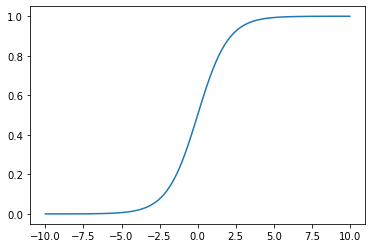

In [20]:
plt.plot(z, probabilities)
plt.show()

In [21]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
# 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

W = eval_model(X_st, y, iterations=10000, eta=1)

0 [ 0.11732727 -1.58914029  0.62030812  0.95688359] 1.1785958344356262
1000 [-10.79956087  -1.38842301  -2.43773192   9.1781253 ] 0.23165947539015322
2000 [-15.46737926  -1.78489608  -3.84058484  12.94996634] 0.19317640063439978
3000 [-19.06453024  -2.10307143  -4.89402886  15.87355904] 0.17038209224193246
4000 [-22.02639821  -2.36864314  -5.74972113  18.28151701] 0.15496509524744972
5000 [-24.55062127  -2.59641317  -6.47260633  20.33229852] 0.1437907257559477
6000 [-26.75533033  -2.7959032   -7.1002527   22.12170973] 0.1352814715728296
7000 [-28.71761855  -2.97355287  -7.65663776  23.71251207] 0.12855136478278154
8000 [-30.49042692  -3.13388494  -8.15795259  25.14787759] 0.12306625393611921
9000 [-32.11152175  -3.28017801  -8.61559398  26.45863223] 0.11848606975828069


In [23]:
# 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже 
# посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [24]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [25]:
W

array([-33.60724757,  -3.41474448,  -9.03744936,  27.66630585])

In [26]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [27]:
# Стандартизация
X = X.copy().astype(np.float64)
X[:, 0] = standard_scale(X_st[:, 1])
X[:, 1] = standard_scale(X_st[:, 1])
X[:, 2] = standard_scale(X_st[:, 2])
X[:, 3] = standard_scale(X_st[:, 3])
X

array([[-0.70710678, -0.70710678, -0.97958969, -0.89625816],
       [-0.70710678, -0.70710678, -0.56713087, -0.89625816],
       [-0.35355339, -0.35355339, -0.46401617,  0.38411064],
       [ 0.70710678,  0.70710678, -0.77336028, -0.89625816],
       [ 0.        ,  0.        ,  0.97958969,  0.38411064],
       [-1.06066017, -1.06066017, -0.36090146, -0.89625816],
       [ 0.70710678,  0.70710678,  1.08270439,  1.66447944],
       [ 2.47487373,  2.47487373,  2.11385144,  1.66447944],
       [-0.70710678, -0.70710678, -1.08270439, -0.89625816],
       [-0.35355339, -0.35355339,  0.05155735,  0.38411064]])

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y_pred_proba = sigmoid(np.dot(X, W))
y_pred_proba

array([9.99964122e-01, 9.98510413e-01, 1.00000000e+00, 7.89517837e-20,
       8.54945753e-01, 9.99999980e-01, 9.99958368e-01, 8.13669376e-29,
       9.99985871e-01, 1.00000000e+00])

In [33]:
# 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model 
# и X, на выходе - массив y_pred).

from sklearn import datasets
from matplotlib.colors import ListedColormap

X, y

(array([[-0.70710678, -0.70710678, -0.97958969, -0.89625816],
        [-0.70710678, -0.70710678, -0.56713087, -0.89625816],
        [-0.35355339, -0.35355339, -0.46401617,  0.38411064],
        [ 0.70710678,  0.70710678, -0.77336028, -0.89625816],
        [ 0.        ,  0.        ,  0.97958969,  0.38411064],
        [-1.06066017, -1.06066017, -0.36090146, -0.89625816],
        [ 0.70710678,  0.70710678,  1.08270439,  1.66447944],
        [ 2.47487373,  2.47487373,  2.11385144,  1.66447944],
        [-0.70710678, -0.70710678, -1.08270439, -0.89625816],
        [-0.35355339, -0.35355339,  0.05155735,  0.38411064]]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

In [34]:
np.random.permutation(X.shape[0])

array([0, 1, 5, 3, 4, 7, 8, 9, 2, 6])

In [35]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(X.shape[0])
X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(X) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (7, 4)
Размер массива признаков тестовой выборки (3, 4)
Размер массива ответов для обучающей выборки (7,)
Размер массива ответов для тестовой выборки (3,)


In [36]:
def log_loss(W, X, y):
    m = X.shape[0]
    
    # функция сигмоиды, написанная ранее
    A = sigmoid(np.dot(X, W))
        
    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

In [37]:
def optimize(W, X, y, n_iterations, eta):
    # список потерь
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(W, X, y)
        W = W - eta * grad

        losses.append(loss)
        
    return W, losses

In [38]:
def calc_pred(W, X):
    
    m = X.shape[0]
    
    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, W)))

    # Порог отнесения к тому или иному классу 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_predicted[i] = 1
        elif (A[i] <= 0.5):
            y_predicted[i] = 0

    return y_predicted

In [39]:
# Иницилизация начального вектора весов
W0 = np.zeros(X_train.shape[1])

n_iterations = 1000
eta = 0.05

W, losses = optimize(W0, X_train, y_train, n_iterations, eta)

y_pred_test = calc_pred(W, X_test)
y_pred_train = calc_pred(W, X_train)

# В качестве меры точности взята доля правильных ответов
train_accuracy = np.mean(y_pred_train == y_train) * 100.0
test_accuracy = np.mean(y_pred_test == y_test) * 100.0

print(f"Итоговый вектор весов W: {W}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов W: [-1.12267007 -1.12267007 -0.16338833  2.5177624 ]
Точность на обучающей выборке: 71.429
Точность на тестовой выборке: 100.000


In [40]:
y_pred_train, y_pred_test

(array([1., 0., 0., 0., 1., 1., 0.]), array([1., 0., 1.]))

In [41]:
y_pred = np.concatenate([y_pred_train, y_pred_test])
y_pred

array([1., 0., 0., 0., 1., 1., 0., 1., 0., 1.])

In [42]:
# 5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

print(f'y = {y}')
print(f'y_pred = {y_pred}')

y = [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
y_pred = [1. 0. 0. 0. 1. 1. 0. 1. 0. 1.]


In [43]:
import pandas as pd 

df = pd.DataFrame({'y':[0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
                  'y_pred':[1., 0., 0., 0., 1., 1., 0., 1., 0., 1.]})
# Создание датафрейма
df

,y,y_pred
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,1.0,1.0
5,0.0,1.0
6,1.0,0.0
7,0.0,1.0
8,1.0,0.0
9,1.0,1.0


In [44]:
# Добавление столбика, который говорит ошиблась или нет модель
df['right'] = df['y'] == df['y_pred']
df

,y,y_pred,right
0,0.0,1.0,False
1,0.0,0.0,True
2,1.0,0.0,False
3,0.0,0.0,True
4,1.0,1.0,True
5,0.0,1.0,False
6,1.0,0.0,False
7,0.0,1.0,False
8,1.0,0.0,False
9,1.0,1.0,True


In [45]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df['y'], df['y_pred'])

0.4

In [46]:
# Матрица ошибок
#           |  y = 1   |  y = 0
# a(x) = 1  |    2     |    3
# a(x) = 0  |    3     |    2
TP = 2
TN = 2
FP = 3
FN = 3
print(f'True Positive TP = {TP}')
print(f'True Negative TN = {TN}')
print(f'False Positive FP = {FP}')
print(f'False Negative FN = {FN}')

True Positive TP = 2
True Negative TN = 2
False Positive FP = 3
False Negative FN = 3


In [48]:
# Точность и полнота
Precision = TP / TP + FP
Recall = TP / TP + FN

In [57]:
print(f'Precision(точность) = {Precision}\nRecall(полнота) = {Recall}')

Precision(точность) = 4.0
Recall(полнота) = 4.0


In [60]:
# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(df['y'], df['y_pred'])
print(f'F1 score = {f1}')

F1 score = 0.4000000000000001


In [62]:
# 6. Могла ли модель переобучиться? Почему?

print(f'Нет, потому что в данном случае модель недообучилась')

Нет, потому что в данном случае модель недообучилась
